In [1]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# Check if folder input exists

# Define the folder name
folder_name = '../input'

# Check if the folder exists
if not os.path.exists(folder_name):
    # If it doesn't exist, create the folder
    os.makedirs(folder_name)
    print(f"'{folder_name}' folder created.")
else:
    print(f"'{folder_name}' folder already exists.")

'../input' folder already exists.


In [3]:
# Check if folder tickers exists

# Define the folder name
folder_name = '../tickers'

# Check if the folder exists
if not os.path.exists(folder_name):
    # If it doesn't exist, create the folder
    os.makedirs(folder_name)
    print(f"'{folder_name}' folder created.")
else:
    print(f"'{folder_name}' folder already exists.")

'../tickers' folder already exists.


In [4]:
# Webscrapping Wikipedia table to get the NASDAQ 100 components
page = requests.get("https://en.wikipedia.org/wiki/Nasdaq-100")
soup = BeautifulSoup(page.text, 'html.parser') 
table = soup.find('table',id='constituents',class_="wikitable sortable")

In [5]:
# Convert html table to dataframe
wiki = pd.read_html(str(table))
wiki = pd.concat(wiki)
wiki.head(40)

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,Advanced Micro Devices,AMD,Information Technology,Semiconductors
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
4,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
5,Amazon,AMZN,Consumer Discretionary,Broadline Retail
6,American Electric Power,AEP,Utilities,Electric Utilities
7,Amgen,AMGN,Health Care,Biotechnology
8,Analog Devices,ADI,Information Technology,Semiconductors
9,Ansys,ANSS,Information Technology,Application Software


In [6]:
wiki.head(80)

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,Advanced Micro Devices,AMD,Information Technology,Semiconductors
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
4,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
...,...,...,...,...
75,Old Dominion Freight Line,ODFL,Industrials,Cargo Ground Transportation
76,Onsemi,ON,Information Technology,Semiconductors
77,Paccar,PCAR,Industrials,Construction Machinery & Heavy Transportation ...
78,Palantir Technologies,PLTR,Information Technology,Internet Services & Infrastructure


In [7]:
wiki.rename(columns={'Company':'Name','Symbol':'Ticker','GICS Sector':'Sector'}, inplace=True)

In [8]:
# Add index row values
new_row = {'Name': 'NASDAQ100', 'Sector': 'Index', 'Ticker': '^NDX'}

# Convert the new row to a DataFrame
new_row_df = pd.DataFrame([new_row])

# Append the new row to the DataFrame
wiki = pd.concat([wiki[['Name','Sector','Ticker']], new_row_df], ignore_index=True)
wiki.head(41)

,Name,Sector,Ticker
0,Adobe Inc.,Information Technology,ADBE
1,Advanced Micro Devices,Information Technology,AMD
2,Airbnb,Consumer Discretionary,ABNB
3,Alphabet Inc. (Class A),Communication Services,GOOGL
4,Alphabet Inc. (Class C),Communication Services,GOOG
5,Amazon,Consumer Discretionary,AMZN
6,American Electric Power,Utilities,AEP
7,Amgen,Health Care,AMGN
8,Analog Devices,Information Technology,ADI
9,Ansys,Information Technology,ANSS


In [9]:
# Get the data for the stock 
index_list = wiki['Ticker'].tolist()

In [10]:
# Save all the historical data
for stock in tqdm(index_list):
    data = yf.download(stock, progress=False,multi_level_index=False,actions=True,auto_adjust=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

  0%|          | 0/102 [00:00<?, ?it/s]

In [11]:
# Get the name of the notebook
notebook_name = os.path.basename(globals()['__vsc_ipynb_file__'])
notebook_name = notebook_name.split('-')[0]

In [12]:
# Save all the tickers data
wiki[['Name','Sector','Ticker']].to_csv(f"../tickers/{notebook_name}.csv",index=True)

In [13]:
# Configuration of different parameters of the notebook
ticker = '^NDX'
year = '2025'

In [14]:
# Check DataFrame
stock_ticker = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_ticker.head(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
1985-10-01,112.139999,112.139999,0.0,112.160004,110.565002,110.620003,0.0,153160000
1985-10-02,110.824997,110.824997,0.0,112.540001,110.779999,112.139999,0.0,164640000
1985-10-03,110.870003,110.870003,0.0,111.184998,110.120003,110.839996,0.0,147300000
1985-10-04,110.074997,110.074997,0.0,110.870003,109.855003,110.870003,0.0,147900000
1985-10-07,108.199997,108.199997,0.0,110.135002,108.175003,110.074997,0.0,128640000
1985-10-08,107.160004,107.160004,0.0,108.269997,106.750000,108.199997,0.0,144100000
1985-10-09,108.629997,108.629997,0.0,108.989998,107.114998,107.160004,0.0,156200000
1985-10-10,109.434998,109.434998,0.0,109.510002,107.809998,108.629997,0.0,154840000
1985-10-11,111.050003,111.050003,0.0,111.120003,109.425003,109.434998,0.0,158220000


In [15]:
# Check DataFrame tail
stock_ticker.tail(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
2025-02-25,21087.250000,21087.250000,0.0,21326.810547,20930.580078,21318.769531,0.0,7991440000
2025-02-26,21132.919922,21132.919922,0.0,21350.519531,21012.619141,21170.509766,0.0,7034450000
2025-02-27,20550.949219,20550.949219,0.0,21323.910156,20540.679688,21281.359375,0.0,7700290000
2025-02-28,20884.410156,20884.410156,0.0,20900.769531,20407.449219,20518.650391,0.0,8247520000
2025-03-03,20425.580078,20425.580078,0.0,21073.800781,20279.500000,20989.580078,0.0,8170140000
2025-03-04,20352.529297,20352.529297,0.0,20688.460938,20034.679688,20281.880859,0.0,8469180000
2025-03-05,20628.460938,20628.460938,0.0,20688.720703,20182.570312,20363.220703,0.0,7048430000
2025-03-06,20052.630859,20052.630859,0.0,20473.410156,19968.560547,20231.740234,0.0,7686200000
2025-03-07,20201.369141,20201.369141,0.0,20253.220703,19736.810547,20015.619141,0.0,8135420000


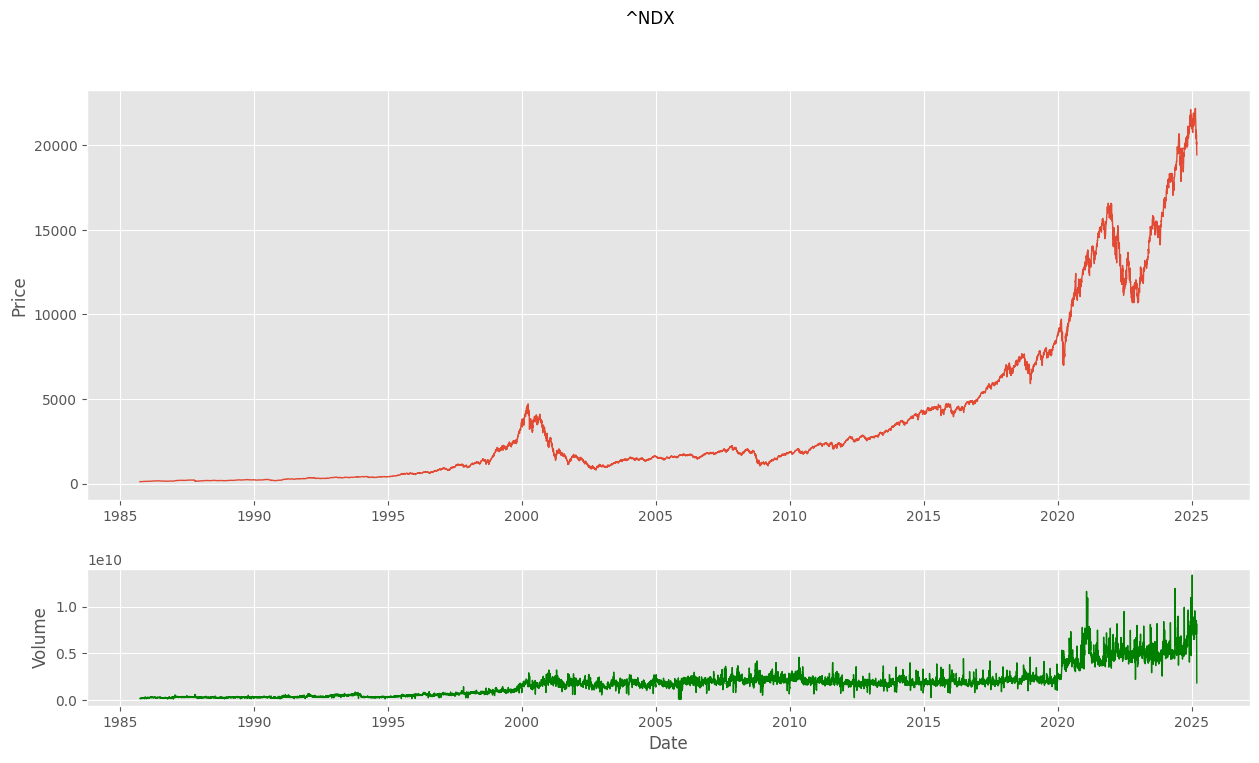

In [16]:
# Plot the adjusted close price of the ^IBEX
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_ticker['Volume'],linewidth=1,color='g')

plt.show()

In [17]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Adj Close'],mode="lines",name=f"{ticker}"),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [18]:
# Group per year and calculate cummulative return
stock_ticker['Year'] = stock_ticker.index.year
annual_data = stock_ticker.groupby('Year').agg(Adj_Close=('Adj Close','last'))
annual_data['Return'] = annual_data["Adj_Close"].pct_change()*100
annual_data

,Adj_Close,Return
Year,,
1985,132.294998,NaN
1986,141.404999,6.886126
1987,156.250000,10.498215
1988,177.410004,13.542402
1989,223.835007,26.168199
1990,200.529999,-10.411690
1991,330.855011,64.990282
1992,360.184998,8.864906
1993,398.279999,10.576510


In [19]:
# Plotly
fig = make_subplots()

# Add colors
colors = ['green' if x >= 0 else 'red' for x in annual_data['Return']]

# Graph (1,1)
fig.add_trace(go.Bar(y=annual_data['Return'],x=annual_data['Return'].index,text=round(annual_data['Return'],2),textposition='outside',marker_color=colors,hoverinfo='skip'),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Returns", row=1, col=1)

fig.update_layout(xaxis=dict(tickvals=annual_data.index,tickangle=-45),height=800, width=1300,title=f"Returns per year {ticker}")

fig.show()

In [20]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_ticker['MMA20'] = stock_ticker['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_ticker["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_ticker['BB_Upper'] = indicator_bb.bollinger_hband()
stock_ticker['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_ticker["Adj Close"].loc[year], window=14)

# RSI
stock_ticker['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_ticker['Daily_Return'] = daily_return(stock_ticker["Adj Close"].loc[year])

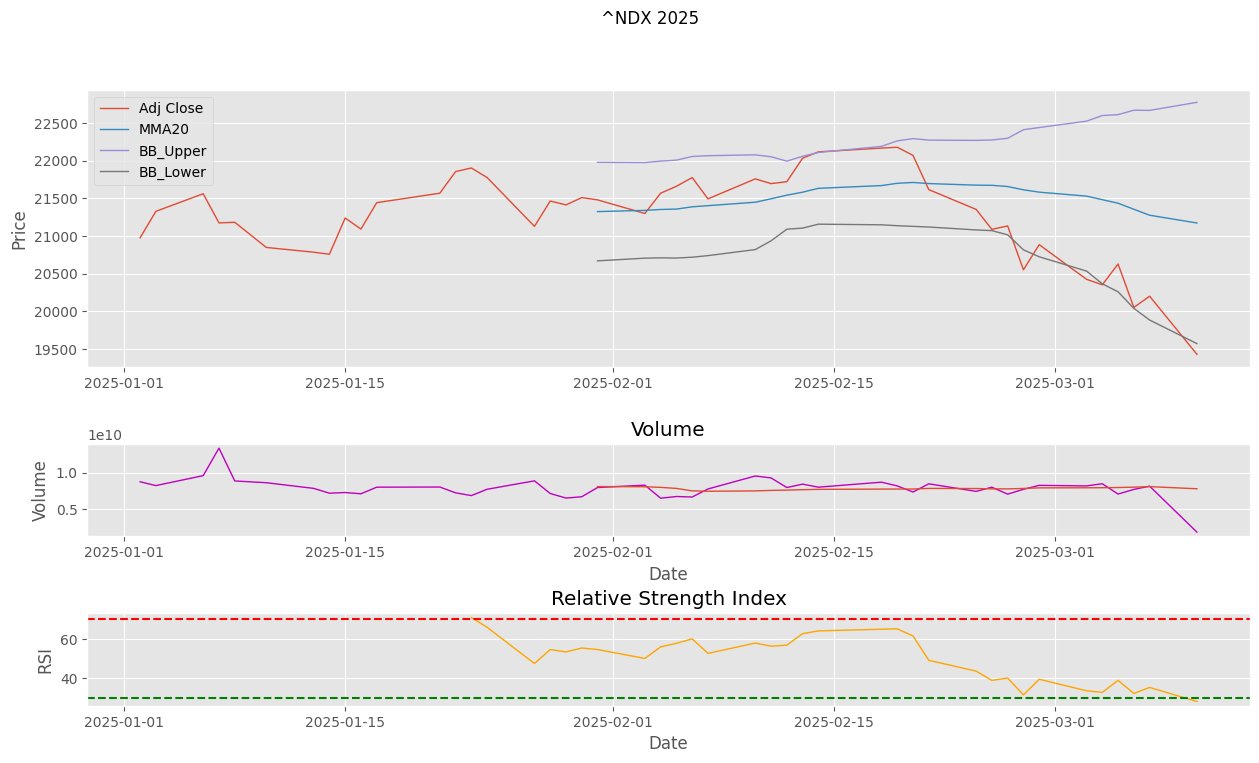

In [21]:
# Plot the adjusted close price of the ^IBEX for year
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_ticker['MMA20'],linewidth=1) 
axs[0].plot(stock_ticker['BB_Upper'],linewidth=1)
axs[0].plot(stock_ticker['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_ticker['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_ticker['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_ticker['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [22]:
# Plot the adjusted close price of the ^IBEX for year
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker['Adj Close'].loc[year].index,y=stock_ticker['Adj Close'].loc[year],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Lower'].loc[year].index,y=stock_ticker['BB_Lower'].loc[year],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Upper'].loc[year].index,y=stock_ticker['BB_Upper'].loc[year],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['MMA20'].loc[year].index,y=stock_ticker['MMA20'].loc[year],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker['RSI'].loc[year].index,y=stock_ticker['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [23]:
stock_ticker.tail(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume,Year,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,,,,
2025-02-25,21087.250000,21087.250000,0.0,21326.810547,20930.580078,21318.769531,0.0,7991440000,2025,21671.265039,22272.230637,21070.299441,39.015016,-1.240301
2025-02-26,21132.919922,21132.919922,0.0,21350.519531,21012.619141,21170.509766,0.0,7034450000,2025,21654.759082,22294.572606,21014.945558,40.207973,0.216576
2025-02-27,20550.949219,20550.949219,0.0,21323.910156,20540.679688,21281.359375,0.0,7700290000,2025,21611.733496,22407.847173,20815.619819,31.698603,-2.753858
2025-02-28,20884.410156,20884.410156,0.0,20900.769531,20407.449219,20518.650391,0.0,8247520000,2025,21580.548047,22437.028939,20724.067155,39.587890,1.622606
2025-03-03,20425.580078,20425.580078,0.0,21073.800781,20279.500000,20989.580078,0.0,8170140000,2025,21527.924512,22521.489626,20534.359397,33.802319,-2.196998
2025-03-04,20352.529297,20352.529297,0.0,20688.460938,20034.679688,20281.880859,0.0,8469180000,2025,21480.671973,22595.992329,20365.351616,32.976015,-0.357644
2025-03-05,20628.460938,20628.460938,0.0,20688.720703,20182.570312,20363.220703,0.0,7048430000,2025,21433.749023,22608.013658,20259.484389,39.037986,1.355761
2025-03-06,20052.630859,20052.630859,0.0,20473.410156,19968.560547,20231.740234,0.0,7686200000,2025,21353.472559,22666.692112,20040.253005,32.443400,-2.791435
2025-03-07,20201.369141,20201.369141,0.0,20253.220703,19736.810547,20015.619141,0.0,8135420000,2025,21274.837500,22664.045788,19885.629212,35.475463,0.741739


  0%|          | 0/102 [00:00<?, ?it/s]

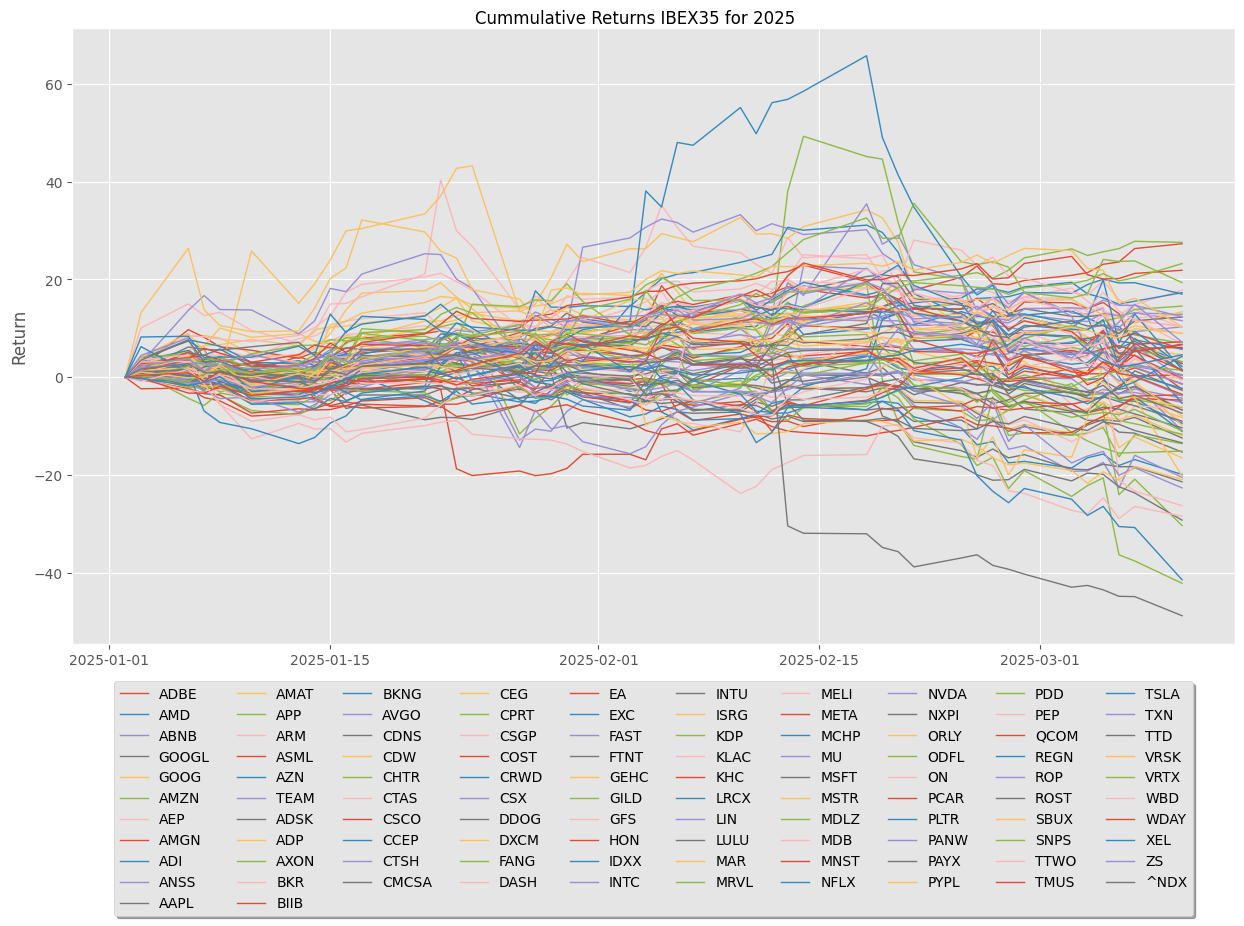

In [24]:
# Plot Cummulative Returns ^IBEX for year
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(stock.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [25]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=stock.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns {ticker} for {year}")

fig.show()

  0%|          | 0/102 [00:00<?, ?it/s]

In [26]:
# Create also table of cummulative returns
list = []

for stock in tqdm(index_list):
    f = os.path.join("../input",stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Cummulative_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Cummulative_Return'])
cum = wiki[['Ticker','Name']].merge(cum,on='Ticker')
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False)


  0%|          | 0/102 [00:00<?, ?it/s]

,Ticker,Name,Date,Cummulative_Return
0,GILD,Gilead Sciences,2025-03-10,27.568571
1,AMGN,Amgen,2025-03-10,27.277359
2,VRTX,Vertex Pharmaceuticals,2025-03-10,23.228016
3,TMUS,T-Mobile US,2025-03-10,21.860869
4,PDD,PDD Holdings,2025-03-10,19.341519
...,...,...,...,...
97,DDOG,Datadog,2025-03-10,-29.227879
98,APP,AppLovin,2025-03-10,-30.341154
99,TSLA,"Tesla, Inc.",2025-03-10,-41.428498
100,MRVL,Marvell Technology,2025-03-10,-42.142176


In [27]:
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False).head(30)

,Ticker,Name,Date,Cummulative_Return
0,GILD,Gilead Sciences,2025-03-10,27.568571
1,AMGN,Amgen,2025-03-10,27.277359
2,VRTX,Vertex Pharmaceuticals,2025-03-10,23.228016
3,TMUS,T-Mobile US,2025-03-10,21.860869
4,PDD,PDD Holdings,2025-03-10,19.341519
5,AEP,American Electric Power,2025-03-10,17.820202
6,EXC,Exelon,2025-03-10,17.278708
7,AZN,AstraZeneca,2025-03-10,16.993666
8,MDLZ,Mondelez International,2025-03-10,14.537818
9,ORLY,O'Reilly Automotive,2025-03-10,13.376161


In [28]:
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False).tail(30)

,Ticker,Name,Date,Cummulative_Return
72,AMAT,Applied Materials,2025-03-10,-8.259295
73,MSFT,Microsoft,2025-03-10,-8.996542
74,ARM,Arm Holdings,2025-03-10,-9.219969
75,BKNG,Booking Holdings,2025-03-10,-9.443958
76,DXCM,DexCom,2025-03-10,-9.910826
77,LULU,Lululemon Athletica,2025-03-10,-10.351591
78,TEAM,Atlassian,2025-03-10,-10.932794
79,SNPS,Synopsys,2025-03-10,-10.958052
80,CRWD,CrowdStrike,2025-03-10,-11.078485
81,AMZN,Amazon,2025-03-10,-11.661070
